In [1]:
import torch
from dataset_class import dataset,params2theta,theta2params
import dataset_class as dc
from matplotlib import pyplot as plt
import pandas as pd

import numpy as np
np.random.seed(42)

In [2]:
cutoff = 300
df = pd.read_csv('real_data/Exp_1_Ecoli_population.csv')
df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(0)

dil_schedule = np.array((20,200,2000))/.9

/tmp/ipykernel_13350/808629437.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
/tmp/ipykernel_13350/808629437.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(0)


In [3]:
def get_counts(df,day):
    ks = df.to_numpy()[df['Day']==day,1:3]

    cts,dils =[],[]
    for k_line in ks:
        index = np.argmax(k_line <= cutoff) if np.any(ks <= cutoff) else len(ks) - 1
        cts.append( k_line[index] )
        dils.append( dil_schedule[index] )

    cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)
    keep = np.logical_and(cts<=300,  cts>=0)
    print('Day {} -- {}/{} datapoints removed'.format(day,(~keep).sum(),keep.size))

    return cts[keep],dils[keep]

In [4]:
days = (3,5,7,9)

data_day =[]
for day in days:
    cts,dils = get_counts(df,day)
    data_day.append(dataset(cts,dils))
    (data_day[-1]).evaluate(10)

Day 3 -- 3/75 datapoints removed
10
5.779136930831431 -287.01050427498245 -127.76698638865511
4.927896924788749 -265.48653688336117 -89.09115383335597
4.6706989686274305 -261.7656776388536 -74.43235487167587
4.5524466599961215 -261.32950309785645 -66.38276679566125
4.468630119810028 -260.7491640929612 -60.951847483027734
4.438638204624161 -261.3084190486194 -58.2610745766367
4.40214909296985 -261.1114209711832 -55.80623623733817
4.362723811439986 -260.88043661414696 -53.22361433754703
4.345178990602285 -261.1329271955799 -51.7070620088545
4.317968354495405 -261.15691232665904 -49.70489051770477
4.264832706816306 -260.1214760768129 -46.92903188339017
4.240975697510578 -260.0971697205697 -45.23445879394911
4.221307376854178 -260.1415224274008 -43.78519167003102
4.211998573249936 -260.4105042825902 -42.84800501061886
4.2000952137318555 -260.4980406704865 -41.90177855784016
4.188234714950197 -260.6190522708717 -40.92778992554539
4.181743361700708 -260.7423590868509 -40.33902849964813
4.177

/tmp/ipykernel_13350/2667590431.py:10: RuntimeWarning: invalid value encountered in cast
  cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)


10
8.863891665048753 -447.79531997680107 -145.51923187754153
7.737655839712842 -406.552274684141 -110.76286975032713
6.8242999255322205 -364.1463959381713 -92.8636999619593
6.662546877319153 -360.6546921892846 -85.69637526207843
6.603539236620003 -361.450967430534 -80.9652090124551
6.568337723943236 -362.17599731055077 -77.8934226130277
6.549925868357769 -362.90875705150216 -75.92627205704099
6.525808545693623 -363.48240124488336 -73.7267410735731
6.490228707585271 -363.4872219345908 -71.32917362021178
6.43951038860859 -363.3768289114279 -68.04276838012018
6.396011124762563 -362.94905576792735 -65.55798322583155
6.348453986533873 -362.4694541093247 -62.85310728669907
6.313734915035202 -362.35438530623173 -60.64714667708103
6.273448657226622 -362.22674602847417 -58.07225892285787
6.24033866188719 -362.1085096408739 -55.980343279646206
6.208951455373935 -362.2958904262322 -53.68096308199644
6.182107779049555 -362.66909909945906 -51.51715607570016
6.145680283981504 -362.8040438468805 -48.

/tmp/ipykernel_13350/2667590431.py:10: RuntimeWarning: invalid value encountered in cast
  cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)


Day 9 -- 10/75 datapoints removed
10
11.465916983918767 -590.0919800403743 -149.02129778135605
8.117228927267075 -418.3980131722581 -108.18315015709938
7.34027509613874 -384.50629434773475 -92.4777764454776
7.190672692650351 -383.0362197909204 -84.3107965549414
7.136487559720946 -383.74550450768936 -80.08955931829891
7.086113312371342 -384.38415722272754 -76.20288838800896
7.0656165182171256 -385.03075614355737 -74.22602073138455
7.04809753647697 -385.4757240283317 -72.63640726195446
7.024128894898511 -385.7944298582555 -70.76151655237868
7.00069714645999 -385.9563765757599 -69.07816708383979
6.984362878980098 -386.19308933778336 -67.78188574928177
6.961089348103878 -386.18581572645894 -66.27514538450416
6.94710165560019 -386.5787463511858 -64.97387812624922
6.916640507443524 -386.55592089303104 -63.007742105597096
6.892572720734984 -386.7773213521623 -61.23005348636211
6.870220893652446 -386.9120912280348 -59.64101708086663
6.850039999736981 -386.9949429926071 -58.245940027567265
6.83

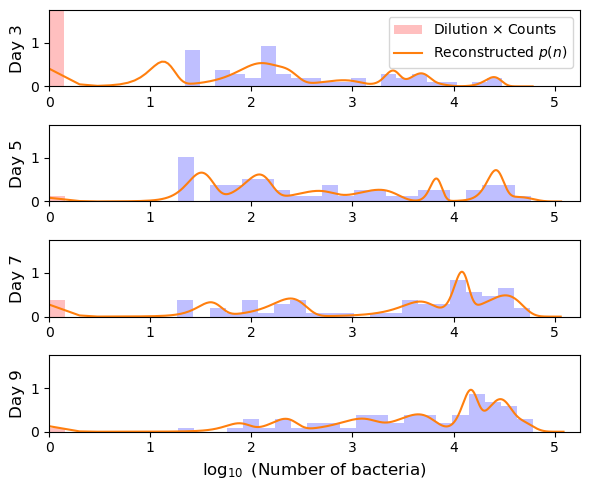

In [5]:
fig,ax = plt.subplots(4,figsize=(6,5))
[dt.log_plots(axi) for (dt,axi) in zip(data_day,ax)]
[(axi.set_xlim(0,5.25),axi.set_ylim(0,1.75)) for axi in ax]
[axi.set_ylabel('Day {}'.format(i),fontsize=12) for (axi,i) in zip(ax,(3,5,7,9))]
[axi.set_xlabel('') for axi in ax[:-1]]
ax[0].legend()
plt.tight_layout()
#plt.savefig()